# Leveling data of level 200 characters

Here's data about level 200 characters in MapleLegends. Data was collected on 2020-12-29 from the ranking page.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ranking data

In [2]:
ranking = pd.read_json("data/ranking.json")
ranking

rank         name        guild                       job  fame
0       1  Hotguy6pack      Project                    Bishop   666
1       2      Unlucky      Project                    Bishop   420
2       3         Babo       Demure                Night Lord  2586
3       4         Nude       Demure                Night Lord   784
4       5      JayChou       Demure                    Bishop  1048
..    ...          ...          ...                       ...   ...
139   140  SexyBumpkin  Goblinology  Archmage (Ice/Lightning)    68
140   141  TheLastHero     EverLast                      Hero   196
141   142  FinalHealth        erion                    Bishop   284
142   143         Gurk        Kyoto                  Shadower   239
143   144      Zabriel     Symphony                 Bowmaster     0

[144 rows x 5 columns]

## Leveling data

In [3]:
leveling = pd.read_json("data/leveling.json")
leveling

name  level           timestamp
0      Hotguy6pack    200 2016-03-11 02:35:20
1      Hotguy6pack    199 2016-02-28 07:29:52
2      Hotguy6pack    198 2016-02-20 05:03:37
3      Hotguy6pack    197 2016-02-15 04:54:06
4      Hotguy6pack    196 2016-02-08 02:11:54
...            ...    ...                 ...
26873         Gurk      2 2020-03-01 20:27:00
26874      Zabriel      4 2018-08-22 13:41:24
26875  FinalHealth      2 2018-01-18 21:24:06
26876      Zabriel      3 2018-08-22 13:29:53
26877      Zabriel      2 2018-08-22 13:23:48

[26878 rows x 3 columns]

Some players are missing levels because the leveling history was added at a later date.

In [4]:
leveling.groupby("name").count().sort_values("level").level

name
Hotguy6pack      18
KurayamiLove     32
Enough           41
JoseBish         43
Zeretius         47
               ... 
Chris22x        199
Kendra          199
CityPT          199
MiIey           199
Leafhe          199
Name: level, Length: 144, dtype: int64

This affects less than 20 people out of 144.

In [5]:
leveling.groupby("name").count().level.hist(cumulative=True)
plt.show()

## Distribution of jobs

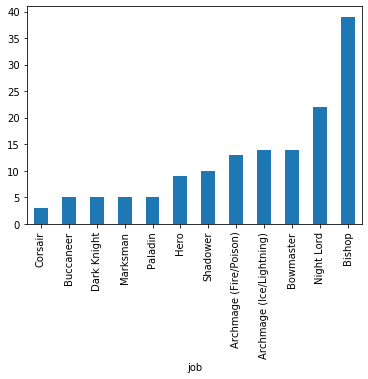

In [6]:
ranking.groupby("job").count().sort_values("name").name.plot.bar()
plt.show()

## Level 200 events by quarter

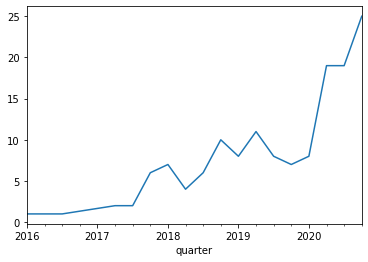

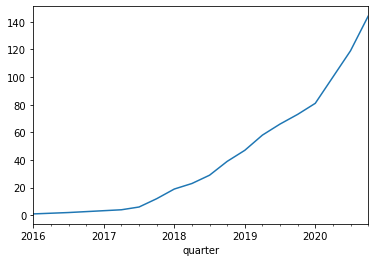

In [7]:
df = leveling.groupby("name").first().reset_index()
df["quarter"] = df.timestamp.dt.to_period("Q")
df.groupby("quarter").count().name.plot()
plt.show()

df.groupby("quarter").count().name.cumsum().plot()
plt.show()

## Distribution of age at level 200

These folks started a bit too early for the data to be neat, so we're going to filter them out.

In [8]:
keep = leveling.groupby("name").last()
keep[keep.level != 2]

level           timestamp
name                                   
Babo            137 2015-10-14 16:53:39
BlackHeart       11 2017-05-21 05:22:01
BoldAsLove      141 2015-10-18 05:48:23
Dawnielle        41 2015-10-18 02:07:57
Enough          160 2015-10-30 07:17:21
Heartphilia      64 2015-10-14 07:40:15
Hotguy6pack     183 2015-10-16 08:13:19
JayChou          90 2015-12-22 00:26:02
JoseBish        158 2015-10-15 17:27:25
KurayamiLove    169 2015-12-30 14:17:46
L3afy            22 2015-11-26 15:16:02
LiquidOoze       37 2017-11-05 19:12:37
OpTiC            82 2015-10-16 11:00:19
PRADA            56 2017-06-11 03:32:14
SwordArt        148 2015-10-15 23:33:25
Unlucky         101 2015-10-16 09:32:04
Zeretius        154 2015-10-18 18:53:41

In [9]:
df = (
    leveling.groupby("name").first()
    .join(keep[keep.level == 2].drop(columns=["level"]), lsuffix="_last", rsuffix="_first")
)
df["gap"] = df.timestamp_last - df.timestamp_first
df = df[~df.gap.isnull()]
df

level      timestamp_last     timestamp_first                gap
name                                                                        
20XX          200 2018-03-25 00:06:28 2017-03-16 04:00:25  373 days 20:06:03
3wen          200 2020-11-14 18:35:42 2017-12-06 13:12:16 1074 days 05:23:26
5Ha0          200 2020-09-16 08:50:02 2018-08-26 03:31:09  752 days 05:18:53
8TEEN         200 2020-10-30 16:49:48 2019-09-02 10:00:46  424 days 06:49:02
9812          200 2019-02-11 00:26:55 2017-05-20 02:08:56  631 days 22:17:59
...           ...                 ...                 ...                ...
michaelxii    200 2019-03-24 01:02:18 2018-06-22 05:49:50  274 days 19:12:28
oXKaidoXo     200 2020-06-30 05:03:43 2018-01-11 07:33:46  900 days 21:29:57
oXLuffyXo     200 2020-06-15 00:54:07 2017-07-14 09:32:34 1066 days 15:21:33
xBoboSword    200 2018-08-11 04:17:13 2017-08-21 05:34:59  354 days 22:42:14
zzzz          200 2017-12-29 15:24:57 2017-03-14 14:16:51  290 days 01:08:06

[127 rows x 4 columns]

In [10]:
df.gap.dt.days.hist(bins=20)
plt.title("days to level 200")
plt.show()

## Time spent at each level

In [11]:
# https://stackoverflow.com/a/20648462
# this would be easier in sql...
df = leveling.sort_values(["name", "level"])
# time to level
df["ttl"] = df.timestamp.diff()
mask = df.name != df.name.shift(1)
df[mask] = np.nan
df = df[~df.ttl.isnull()]
df["ttl_hours"] = df.ttl.dt.total_seconds() / 3600
df["level"] = df.level.astype(int)
df = df.set_index("name").join(ranking[["name", "job"]].set_index("name"))

df

level           timestamp              ttl   ttl_hours        job
name                                                                   
20XX      3 2017-03-16 04:04:06  0 days 00:03:41    0.061389     Bishop
20XX      4 2017-03-16 04:06:00  0 days 00:01:54    0.031667     Bishop
20XX      5 2017-03-16 04:08:49  0 days 00:02:49    0.046944     Bishop
20XX      6 2017-03-16 04:15:14  0 days 00:06:25    0.106944     Bishop
20XX      7 2017-03-16 04:29:31  0 days 00:14:17    0.238056     Bishop
...     ...                 ...              ...         ...        ...
zzzz    196 2017-11-19 09:51:35  6 days 20:10:50  164.180556  Bowmaster
zzzz    197 2017-11-30 12:59:02 11 days 03:07:27  267.124167  Bowmaster
zzzz    198 2017-12-07 17:00:39  7 days 04:01:37  172.026944  Bowmaster
zzzz    199 2017-12-21 14:36:35 13 days 21:35:56  333.598889  Bowmaster
zzzz    200 2017-12-29 15:24:57  8 days 00:48:22  192.806111  Bowmaster

[26734 rows x 5 columns]

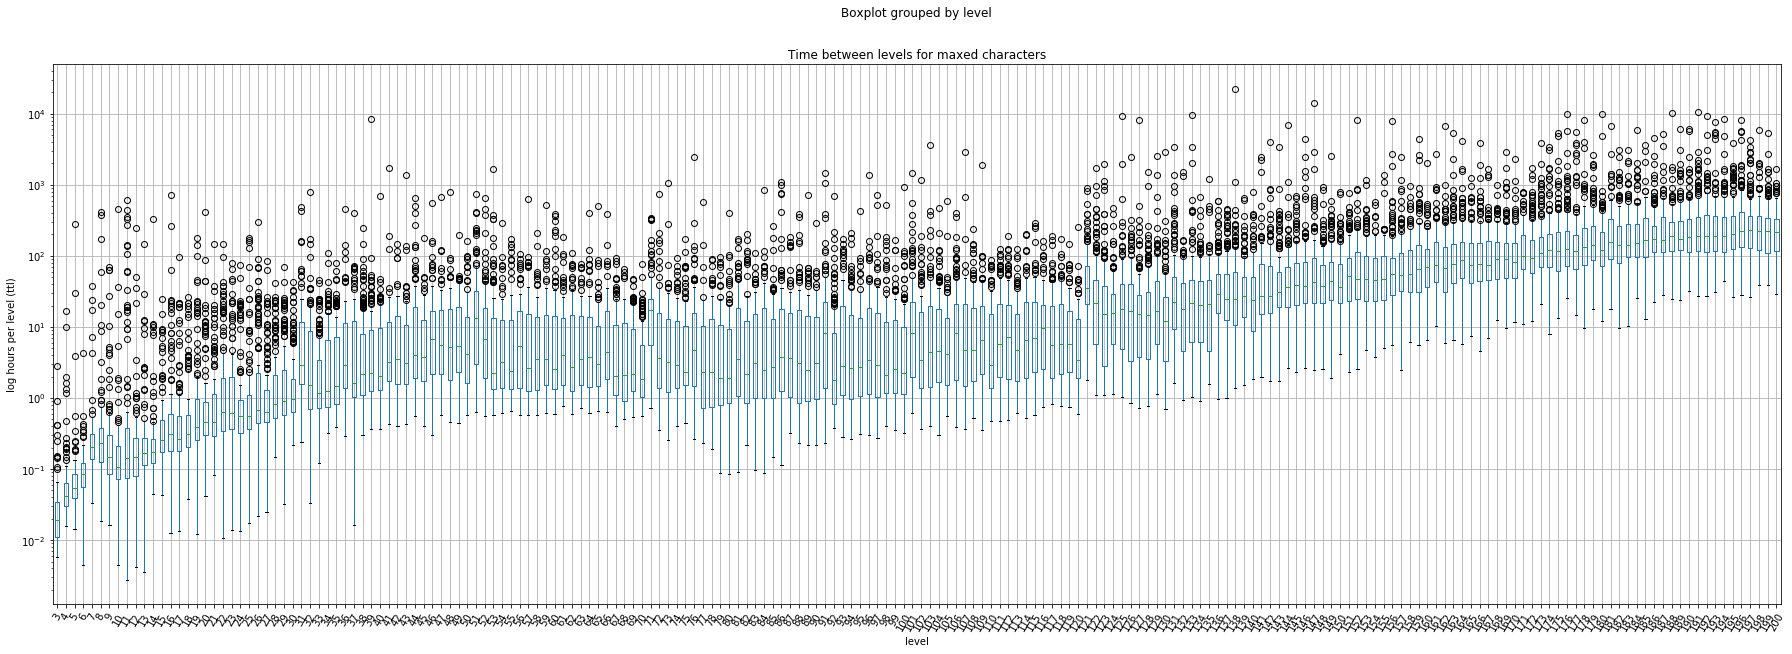

In [12]:
df.boxplot(column="ttl_hours", by="level", rot=60, figsize=(30,10))
plt.title("Time between levels for maxed characters")
plt.ylabel("log hours per level (ttl)")
plt.yscale("log")
plt.show()

## Time spent between 155 and 180 by class

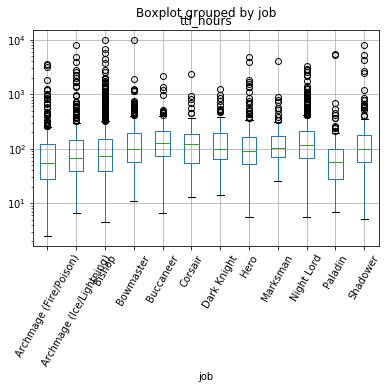

In [13]:
df[(155 <= df.level) & (df.level <= 180)].boxplot(column="ttl_hours", by="job", rot=60)
plt.yscale("log")
plt.show()